***

### Regresión exponencial

Generamos un ejemplo con un dataset de tendencia exponencial:

```y = a * 10^(b * x)```

donde a es la amplitud de la curva y b es la tasa de crecimiento, x representa el número de períodos e y es el valor en ese período.

Generamos un dataset de 10 períodos con una amplitud de a = 2 y una tasa de crecimiento de b = 0.5 en Python:

In [73]:
import numpy as np
import pandas as pd

# definir los valores de a y b
a = 2
b = 0.5

# generar los valores de x
x = np.linspace(0, 10, 12000)

# calcular los valores de y
y = a * 10 ** (b * x)

# crear un dataframe con los valores de x e y
df = pd.DataFrame({'x': x, 'y': y})

df

,x,y
0,0.000000,2.000000
1,0.000833,2.001920
2,0.001667,2.003842
3,0.002500,2.005765
4,0.003334,2.007691
...,...,...
11995,9.996666,199233.878782
11996,9.997500,199425.133517
11997,9.998333,199616.571848
11998,9.999167,199808.193950


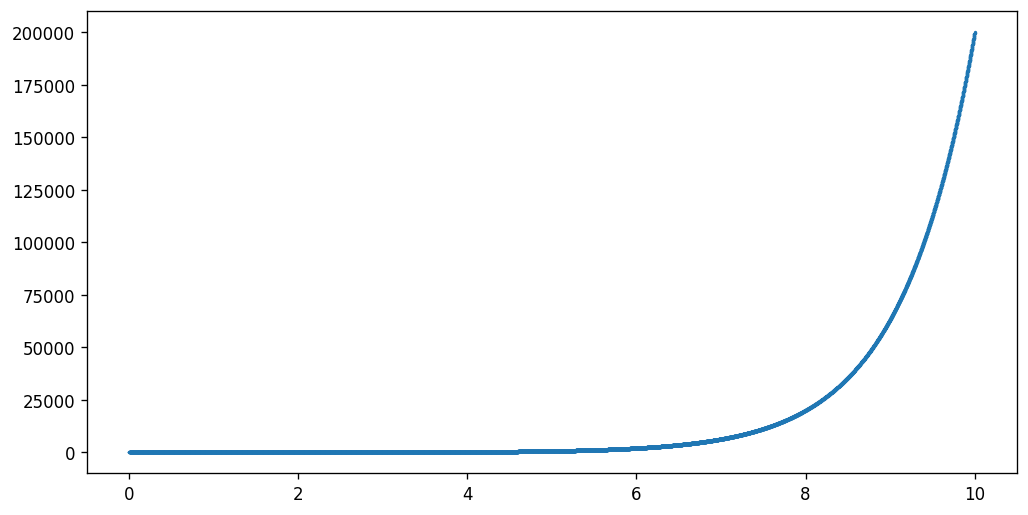

In [74]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})

plt.scatter(df["x"], df["y"], s = 1)

In [75]:
# Añado ruido en x e y
mu = 0
sigma = 0.1
df["x"] += np.random.normal(mu, sigma, len(df))
df["y"] += df["y"] * np.random.normal(mu, sigma, len(df))

# ordeno por las x's
df = df.sort_values("x")
df.reset_index(drop=True, inplace=True)

# quito los últimos 2000 datos
df = df.iloc[:-2000]
df

,x,y
0,-0.298037,2.221821
1,-0.263870,2.061139
2,-0.185081,2.205825
3,-0.173201,1.894417
4,-0.126578,1.875985
...,...,...
9995,8.330828,25597.804103
9996,8.331105,42972.989557
9997,8.332479,20723.159173
9998,8.332994,31817.400734


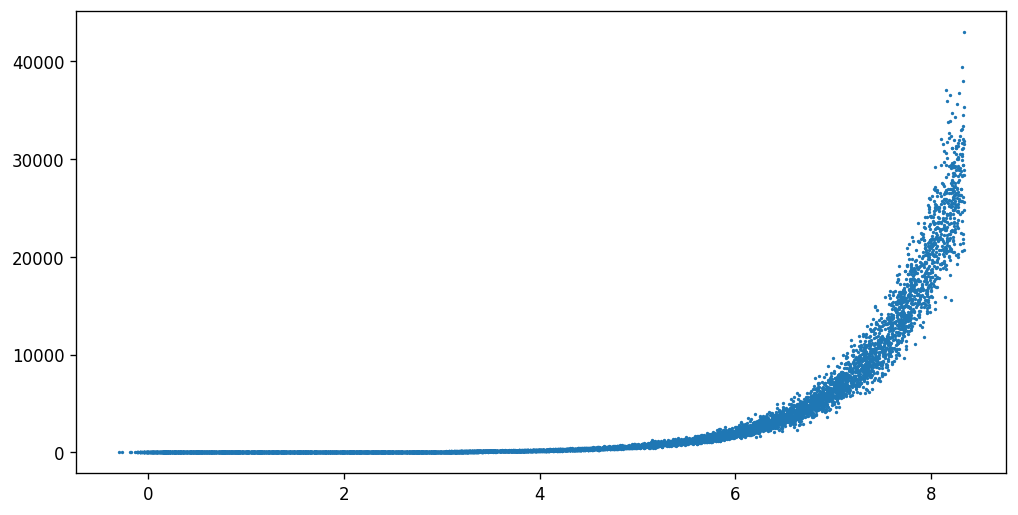

In [76]:
plt.scatter(df["x"], df["y"], s = 1)

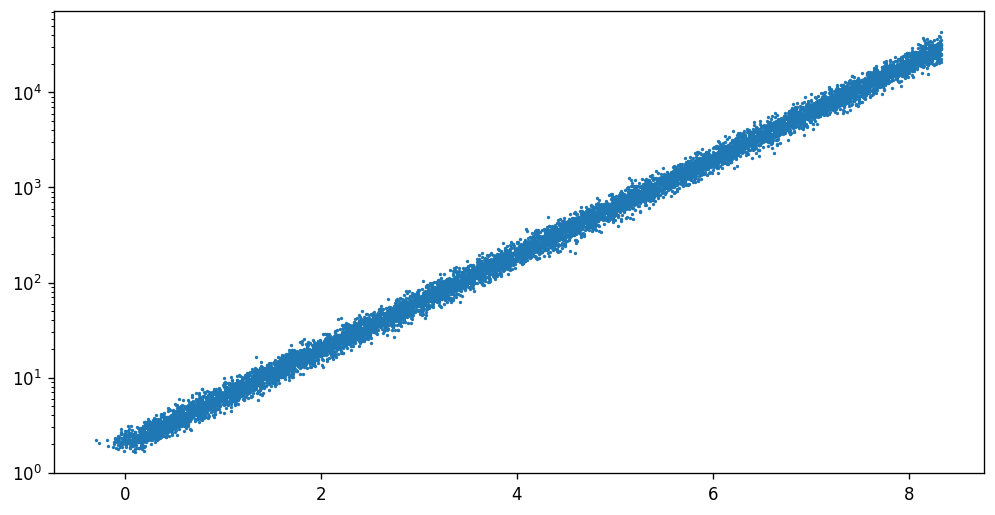

In [77]:
fig, ax = plt.subplots()
ax.scatter(df["x"], df["y"], s = 1)
ax.set_yscale("log")
plt.show()

***

### Normalización

¿Por qué necesitamos normalizar nuestros datos?

Porque algunos modelos son sensibles al orden de magnitud de las características. Si una característica tiene un orden de magnitud igual a 1000, por ejemplo, y otra característica tiene un orden de magnitud igual a 10, algunos modelos pueden “pensar” que la primera característica es más importante que la segunda. Obviamente es un sesgo, porque el orden de magnitud no nos da ninguna información sobre el poder predictivo. 

Entonces, necesitamos eliminar este sesgo transformando las variables para darles el mismo orden de magnitud. Este es el papel de las transformaciones de escala. Dichas transformaciones pueden ser la normalización (que transforma cada variable en un intervalo 0–1) y la estandarización (que transforma cada variable en una variable de media 0 y desviación estandard unitaria).

**Las redes neuronales son muy sensibles al orden de magnitud de las características**. Las funciones de activación siempre requieren datos normalizados, de lo contrario, la fase de entrenamiento sufrirá el problema del gradiente de fuga.

Más detalles en https://towardsdatascience.com/which-models-require-normalized-data-d85ca3c85388

In [78]:
# Normalización
df["logY"] = df["y"].apply(lambda x: np.log10(x))
df

,x,y,logY
0,-0.298037,2.221821,0.346709
1,-0.263870,2.061139,0.314107
2,-0.185081,2.205825,0.343571
3,-0.173201,1.894417,0.277476
4,-0.126578,1.875985,0.273229
...,...,...,...
9995,8.330828,25597.804103,4.408203
9996,8.331105,42972.989557,4.633196
9997,8.332479,20723.159173,4.316456
9998,8.332994,31817.400734,4.502665


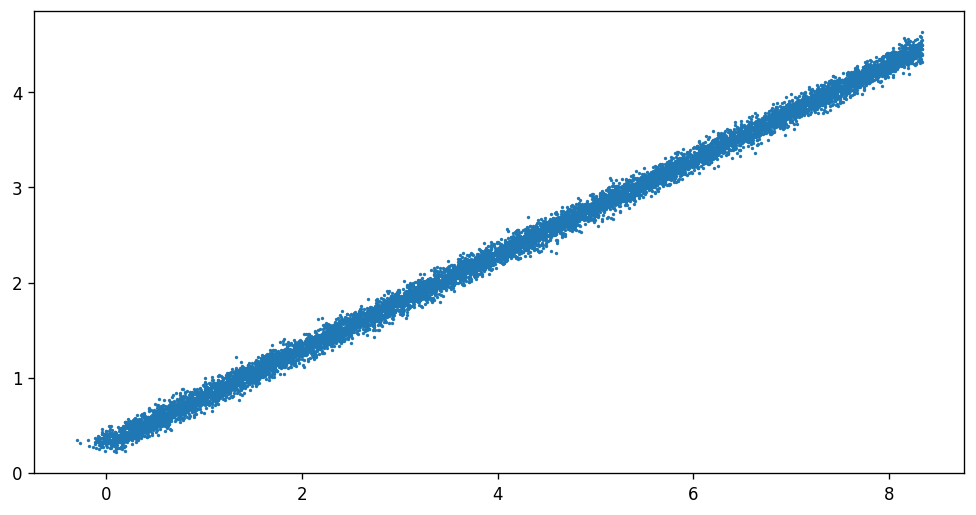

In [79]:
# Gráfica del dato normalizado, resulta lineal
plt.scatter(df["x"], df["logY"], s = 1)

***

### Regresión lineal del dato normalizado usando una red neuronal de pyTorch

In [80]:
# Vamos a hacer un split entre train y test
from sklearn.model_selection import train_test_split

dfTrain, dfTest = train_test_split(df, test_size=0.1, shuffle=False)

In [81]:
dfTrain

,x,y,logY
0,-0.298037,2.221821,0.346709
1,-0.263870,2.061139,0.314107
2,-0.185081,2.205825,0.343571
3,-0.173201,1.894417,0.277476
4,-0.126578,1.875985,0.273229
...,...,...,...
8995,7.497981,11905.631293,4.075752
8996,7.500569,9074.750729,3.957835
8997,7.501730,10803.042815,4.033546
8998,7.501998,9893.338059,3.995343


In [82]:
# pip install torch
# conda install PyTorch -c PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Define la arquitectura de la red
# La clase SimpleNet hereda de la clase nn.Module
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()  # Llamada al método __init__ del padre o clase base de la clase actual.
                            # está llamando al método __init__ de la clase nn.Module.
        self.fc = nn.Linear(10, 10) #  Crea una capa de red neuronal lineal, también conocida como una capa fully connected (fc)
                            # y la asigna como un atributo de la clase SimpleNet con el nombre fc.
                            # nn.Linear es una clase de PyTorch que define una capa de red neuronal lineal con una entrada y una salida.
                            # nn.Linear(10, 10) crea una capa con 10 entradas y 10 salidas. 

    def forward(self, x):   # método de la clase SimpleNet que define cómo las entradas son transformadas en las salidas
                            # a través de las capas de la red neuronal. Es un método requerido para todas las subclases
                            # de nn.Module en PyTorch.
                            # x representa la entrada a la red neuronal, y el método debe devolver la salida correspondiente.
                            # forward toma una entrada x y la pasa a través de la capa fully connected self.fc mediante
                            # la línea x = self.fc(x). La salida de esta capa es entonces devuelta como la salida de la red neuronal.
        x = self.fc(x)
        return x

# Instancie la red
model = SimpleNet()

# Defina la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entrene el modelo
numEpochs = len(dfTrain) # cada epoch admite 10 datos de input
for i in range(0, numEpochs-10):
    # Cada iteración (epoch) cambian los datos de entrada, recorriendo el dataset de training
    inputs = dfTrain.loc[i:i+9]["x"]
    targets = dfTrain.loc[i:i+9]["logY"] # a la red neuronal se le alimenta con el dato normalizado

    # print("inputs: ", inputs)
    # print(inputs.shape())

    # Convertir dataframes en tensores de tipo float32, que es lo que necesita pyTorch
    inputs = torch.tensor(inputs.to_numpy().copy(), dtype=torch.float32)
    targets = torch.tensor(targets.to_numpy().copy(), dtype=torch.float32)

    # Para afinar más el ajuste del modelo se repiten iteraciones con mismos datos
    for j in range(0, 5):
        # Ajuste el modelo
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f'Iteración {i, j}, pérdida: {loss.item()}')

Iteración (0, 0), pérdida: 0.10060682147741318
Iteración (0, 1), pérdida: 0.1000860184431076
Iteración (0, 2), pérdida: 0.09956790506839752
Iteración (0, 3), pérdida: 0.09905247390270233
Iteración (0, 4), pérdida: 0.09853971004486084
Iteración (100, 0), pérdida: 0.021859532222151756
Iteración (100, 1), pérdida: 0.02176760695874691
Iteración (100, 2), pérdida: 0.021676072850823402
Iteración (100, 3), pérdida: 0.021584924310445786
Iteración (100, 4), pérdida: 0.02149415947496891
Iteración (200, 0), pérdida: 0.013854505494236946
Iteración (200, 1), pérdida: 0.013782019726932049
Iteración (200, 2), pérdida: 0.013709915801882744
Iteración (200, 3), pérdida: 0.013638186268508434
Iteración (200, 4), pérdida: 0.013566836714744568
Iteración (300, 0), pérdida: 0.006133469752967358
Iteración (300, 1), pérdida: 0.006093472708016634
Iteración (300, 2), pérdida: 0.006053735036402941
Iteración (300, 3), pérdida: 0.006014254875481129
Iteración (300, 4), pérdida: 0.0059750317595899105
Iteración (400, 0

In [83]:
dfTest

,x,y,logY
9000,7.503158,12998.894798,4.113906
9001,7.510245,11676.987156,4.067331
9002,7.510405,10047.746766,4.002069
9003,7.510534,10414.146268,4.017624
9004,7.510924,9343.005963,3.970487
...,...,...,...
9995,8.330828,25597.804103,4.408203
9996,8.331105,42972.989557,4.633196
9997,8.332479,20723.159173,4.316456
9998,8.332994,31817.400734,4.502665


In [84]:
# Genero predicción en el dataset del test
dfTest["logForecast"] = 0
for i in dfTest.index:
    if i%10 == 0: # batches of 10 items
        # print("i = ", i)
        inputTest = dfTest.loc[i:i+9]["x"]
        # print("inputTest:", inputTest)

        # Convertir dataframes en tensores de tipo float32, que es lo que necesita pyTorch
        inputTest = torch.tensor(inputTest.to_numpy().copy(), dtype=torch.float32)
        # print("inputTest:", inputTest)

        outputTest = model(inputTest)
        # print("outputTest:", outputTest)

        dfTest.loc[i:i+9, "logForecast"] = outputTest.detach().numpy()

In [85]:
dfTest

,x,y,logY,logForecast
9000,7.503158,12998.894798,4.113906,4.032596
9001,7.510245,11676.987156,4.067331,4.065781
9002,7.510405,10047.746766,4.002069,3.943427
9003,7.510534,10414.146268,4.017624,3.908154
9004,7.510924,9343.005963,3.970487,4.022494
...,...,...,...,...
9995,8.330828,25597.804103,4.408203,4.523584
9996,8.331105,42972.989557,4.633196,4.494673
9997,8.332479,20723.159173,4.316456,4.365735
9998,8.332994,31817.400734,4.502665,4.452483


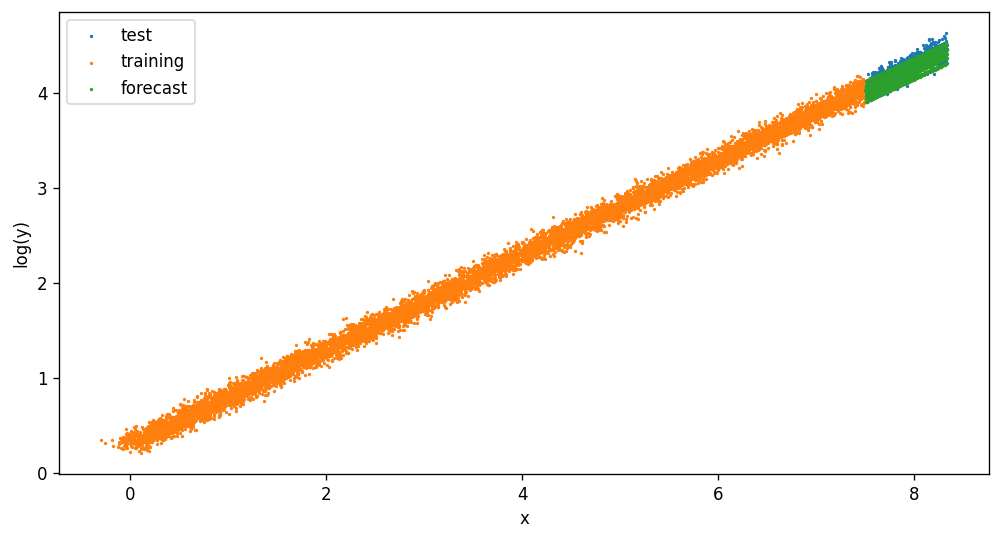

In [86]:
# Gráfica de la predicción normalizada
plt.scatter(dfTest["x"], dfTest["logY"], label="test", s=1)
plt.scatter(dfTrain["x"], dfTrain["logY"], label="training", s=1)
plt.scatter(dfTest["x"], dfTest["logForecast"], label="forecast", s=1)

plt.ylabel("log(y)")
plt.xlabel("x")
plt.legend()
plt.show()

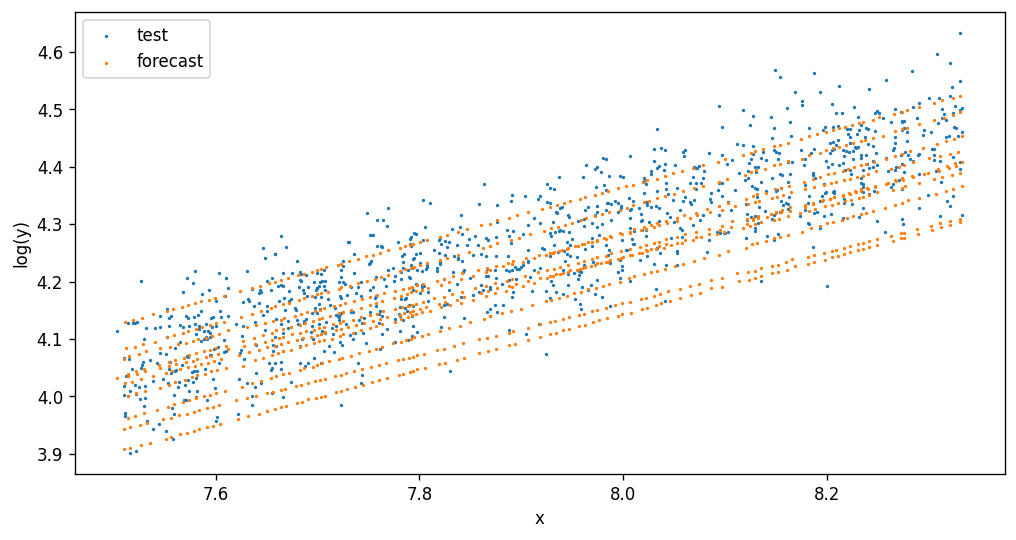

In [89]:
# Gráfica ZOOM de la predicción normalizada
plt.scatter(dfTest["x"], dfTest["logY"], label="test", s=1)
plt.scatter(dfTest["x"], dfTest["logForecast"], label="forecast", s=1)

plt.ylabel("log(y)")
plt.xlabel("x")
plt.legend()
plt.show()

In [87]:
# Desnormalización
dfTest["forecast"] = dfTest["logForecast"].apply(lambda x: 10**x)

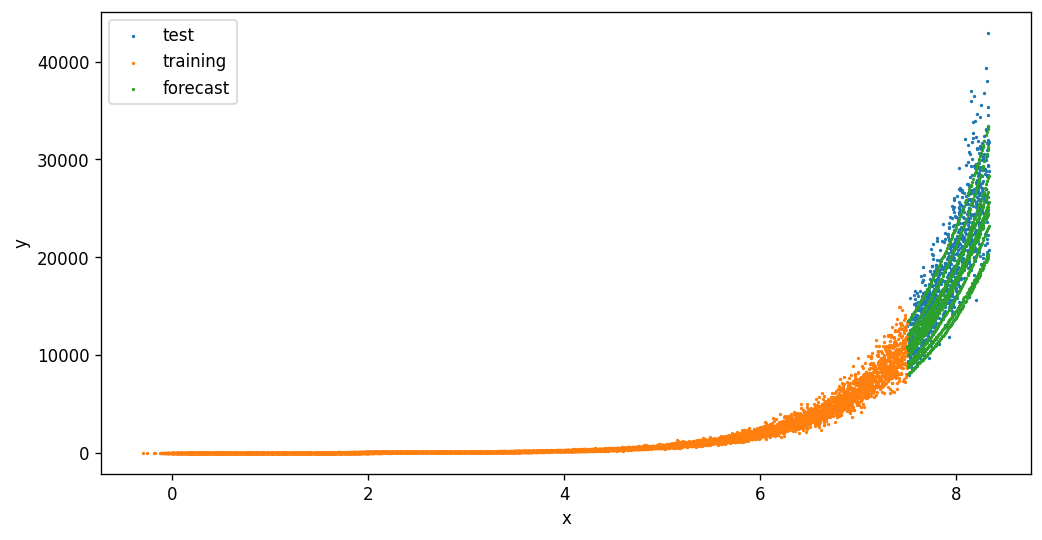

In [88]:
# Gráfica de la predicción desnormalizada
plt.scatter(dfTest["x"], dfTest["y"], label="test", s=1)
plt.scatter(dfTrain["x"], dfTrain["y"], label="training", s=1)
plt.scatter(dfTest["x"], dfTest["forecast"], label="forecast", s=1)

plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

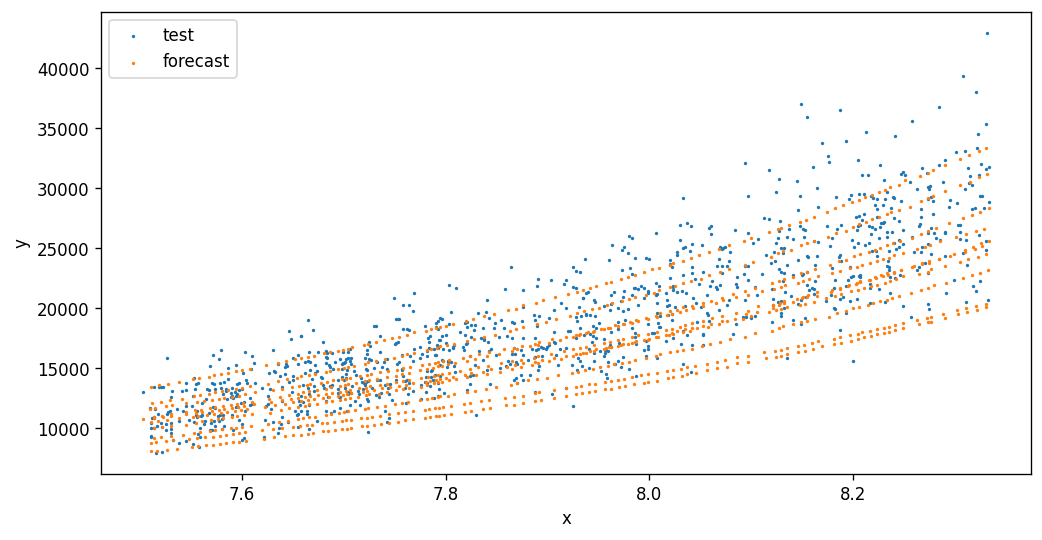

In [90]:
# Gráfica ZOOM de la predicción desnormalizada
plt.scatter(dfTest["x"], dfTest["y"], label="test", s=1)
plt.scatter(dfTest["x"], dfTest["forecast"], label="forecast", s=1)

plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

***

## Conclusiones

1. La red neuronal realiza correctamente la regresión lineal habiendo previamente normalizado los datos en la escala logarítmica.

2. Al disponer de 10 neuronas en la capa de salida, se forman 10 franjas en los resultados de predicción, cubriendo todo el área de dispersión de los datos.

***

## Ejercicio

Probar a realizar la predicción sin el proceso de normalización y desnormalización

In [ ]:
import numpy as np
import pandas as pd
# definir los valores de a y b
a = 2
b = 0.5
# generar los valores de x
x = np.linspace(0, 10, 12000)
# calcular los valores de y
y = a * 10 ** (b * x)
# crear un dataframe con los valores de x e y
df = pd.DataFrame({'x': x, 'y': y})
df

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})

plt.scatter(df["x"], df["y"], s = 1)

In [ ]:
# Añado ruido en x e y
mu = 0
sigma = 0.1
df["x"] += np.random.normal(mu, sigma, len(df))
df["y"] += df["y"] * np.random.normal(mu + 1, sigma, len(df))
# ordeno por las x's
df = df.sort_values("x")
df.reset_index(drop=True, inplace=True)
# quito los últimos 2000 datos
df = df.iloc[:-2000]
df

In [ ]:
plt.scatter(df["x"], df["y"], s = 1)

***

### Regresión exponencial del dato sin normalizar usando una red neuronal de pyTorch

In [ ]:
# Vamos a hacer un split entre train y test
from sklearn.model_selection import train_test_split
dfTrain, dfTest = train_test_split(df, test_size=0.1, shuffle=False)
dfTrain

In [ ]:
# pip install torch
# conda install PyTorch -c PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Define la arquitectura de la red
# La clase SimpleNet hereda de la clase nn.Module
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()  # Llamada al método __init__ del padre o clase base de la clase actual.
                            # está llamando al método __init__ de la clase nn.Module.
        self.fc = nn.Linear(10, 10) #  Crea una capa de red neuronal lineal, también conocida como una capa fully connected (fc)
                            # y la asigna como un atributo de la clase SimpleNet con el nombre fc.
                            # nn.Linear es una clase de PyTorch que define una capa de red neuronal lineal con una entrada y una salida.
                            # nn.Linear(10, 10) crea una capa con 10 entradas y 10 salidas. 

    def forward(self, x):   # método de la clase SimpleNet que define cómo las entradas son transformadas en las salidas
                            # a través de las capas de la red neuronal. Es un método requerido para todas las subclases
                            # de nn.Module en PyTorch.
                            # x representa la entrada a la red neuronal, y el método debe devolver la salida correspondiente.
                            # forward toma una entrada x y la pasa a través de la capa fully connected self.fc mediante
                            # la línea x = self.fc(x). La salida de esta capa es entonces devuelta como la salida de la red neuronal.
        x = self.fc(x)
        return x

# Instancie la red
model = SimpleNet()

# Defina la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entrene el modelo
numEpochs = len(dfTrain) # cada epoch admite 10 datos de input
for i in range(0, numEpochs-10):
    # Cada iteración (epoch) cambian los datos de entrada, recorriendo el dataset de training
    inputs = dfTrain.loc[i:i+9]["x"]
    targets = dfTrain.loc[i:i+9]["y"] # a la red neuronal se le alimenta con el dato sin normalizar

    # print("inputs: ", inputs)
    # print(inputs.shape())

    # Convertir dataframes en tensores de tipo float32, que es lo que necesita pyTorch
    inputs = torch.tensor(inputs.to_numpy().copy(), dtype=torch.float32)
    targets = torch.tensor(targets.to_numpy().copy(), dtype=torch.float32)

    # Para afinar más el ajuste del modelo se repiten iteraciones con mismos datos
    for j in range(0, 5):
        # Ajuste el modelo
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f'Iteración {i, j}, pérdida: {loss.item()}')

dfTest

In [ ]:
# Genero predicción en el dataset del test
dfTest["logForecast"] = 0
for i in dfTest.index:
    if i%10 == 0: # batches of 10 items
        # print("i = ", i)
        inputTest = dfTest.loc[i:i+9]["x"]
        # print("inputTest:", inputTest)

        # Convertir dataframes en tensores de tipo float32, que es lo que necesita pyTorch
        inputTest = torch.tensor(inputTest.to_numpy().copy(), dtype=torch.float32)
        # print("inputTest:", inputTest)

        outputTest = model(inputTest)
        # print("outputTest:", outputTest)

        dfTest.loc[i:i+9, "forecast"] = outputTest.detach().numpy()

dfTest        

In [ ]:
# Gráfica de la predicción en escala logarítmica
fig, ax = plt.subplots()
ax.scatter(dfTest["x"], dfTest["y"], label="test", s=1)
ax.scatter(dfTrain["x"], dfTrain["y"], label="training", s=1)
ax.scatter(dfTest["x"], dfTest["forecast"], label="forecast", s=1)

ax.set_yscale("log")

plt.ylabel("log(y)")
plt.xlabel("x")
plt.legend()
plt.show()

In [ ]:
# Gráfica de la predicción en escala lineal
plt.scatter(dfTest["x"], dfTest["y"], label="test", s=1)
plt.scatter(dfTrain["x"], dfTrain["y"], label="training", s=1)
plt.scatter(dfTest["x"], dfTest["forecast"], label="forecast", s=1)

plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

***

## Conclusiones

1. Bajo el criterio de RMSE la red neuronal realiza bastante bien la regresión sin normalizar los datos en la escala logarítmica.

2. Sin embargo, la tendencia de las franjas de predicción no son exponenciales sino lineales. Por tanto en un test de mayor amplitud, la predicción perderá calidad.

3. Si hubieramos aplicado normalización logarítmica, la regresión de la red neuronal sería mucho más precisa y acertada.